In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from scipy.stats import multivariate_normal
from math import sqrt
import math
from scipy.stats import norm as detnorm
import numpy as np
import numpy.linalg as linalg
from random import sample
import csv
import copy
import os
import glob
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import array

In [22]:
def ROC (P,T):
    inc = 0.01
    n = np.size(P,0)
    m = np.size(P,1)
    TPR = np.zeros(100) # change accordingly with inc
    FPR = np.zeros(100)
    i = 0
    print(n)
    for tet in np.arange(0.0, 1.0, inc):
        tet = 1.0 - tet
        TP = 0
        FP = 0
        TN = 0
        FN = 0
        for cls in range(m):
            #print(cls)
            for data in range(n):
                if ((T[data] == cls) and (P[data][cls] >= tet)):
                    TP = TP + 1
                if ((T[data] == cls) and (P[data][cls] <= tet)):
                    FN = FN + 1
                if ((T[data] != cls) and (P[data][cls] >= tet)):
                    FP = FP + 1
                if ((T[data] != cls) and (P[data][cls] <= tet)):
                    TN = TN + 1
        TPR[i] = TP/(TP + FN)
        FPR[i] = FP/(FP + TN)     
        i = i + 1
    plt.plot(FPR,TPR)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.show()

4


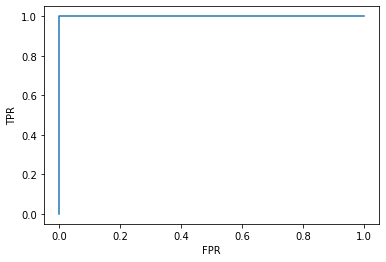

In [23]:
P = [[0.6,0.4],[0.2,0.8],[0.3,0.7],[0.9,0.1]]
#print(np.size(P,1))
T = [0,1,1,0]
ROC(P,T)

In [56]:
def detection_error_tradeoff(fps,fns):
    """
    Given false positive and false negative rates, produce a DET Curve.
    The false positive rate is assumed to be increasing while the false
    negative rate is assumed to be decreasing.
    """
    axis_min = min(fps[0],fns[-1])
    fig,ax = plt.subplots()
    plt.plot(fps,fns)
    plt.yscale('log')
    plt.xscale('log')
    plt.gca().invert_yaxis()
    ticks_to_use = [0.001,0.002,0.005,0.01,0.02,0.05,0.1,0.2,0.5,1,2,5,10,20,50]
    ax.get_xaxis().set_major_formatter(plt.matplotlib.ticker.ScalarFormatter())
    ax.get_yaxis().set_major_formatter(plt.matplotlib.ticker.ScalarFormatter())
    ax.set_xticks(ticks_to_use)
    ax.set_yticks(ticks_to_use)
    plt.axis([0.001,50,0.001,50])

In [57]:
def DET (P,T):
    inc = 0.01
    n = np.size(P,0)
    m = np.size(P,1)
    FNR = np.zeros(100) # change accordingly with inc
    FPR = np.zeros(100)
    i = 0
    print(n)
    for tet in np.arange(0.0, 1.0, inc):
        tet = 1.0 - tet
        TP = 0
        FP = 0
        TN = 0
        FN = 0
        for cls in range(m):
            for data in range(n):
                if ((T[data] == cls) and (P[data][cls] >= tet)):
                    TP = TP + 1
                if ((T[data] == cls) and (P[data][cls] <= tet)):
                    FN = FN + 1
                if ((T[data] != cls) and (P[data][cls] >= tet)):
                    FP = FP + 1
                if ((T[data] != cls) and (P[data][cls] <= tet)):
                    TN = TN + 1
        FNR[i] = FN/(TP + FN)
        FPR[i] = FP/(FP + TN)     
        i = i + 1
    detection_error_tradeoff(FPR,FNR)

In [58]:
dnorm = lambda t:(detnorm.ppf(t))    


In [59]:
def DETmodf (P,T,num):
    mini = np.amin(P)
    maxi = np.amax(P)
    inc = (maxi-mini)/num
    n = np.size(P,0)
    m = np.size(P,1)
    FPR = np.zeros(num+2) # change accordingly with inc
    FNR = np.zeros(num+2)
    i = 0
    #print(inc)
    for tet in np.arange(mini,maxi+inc,inc):
        TP = 0
        FP = 0
        TN = 0
        FN = 0
        for cls in range(m):
            for data in range(n):
                if ((T[data] == cls) and (P[data][cls] >= tet)):
                    TP = TP + 1
                if ((T[data] == cls) and (P[data][cls] <= tet)):
                    FN = FN + 1
                if ((T[data] != cls) and (P[data][cls] >= tet)):
                    FP = FP + 1
                if ((T[data] != cls) and (P[data][cls] <= tet)):
                    TN = TN + 1
        FNR[i] = FN/(TP + FN)
        FPR[i] = FP/(FP + TN)     
        i = i + 1
    FPR1 = (np.array([dnorm(xi) for xi in FPR]))
    FNR1 = (np.array([dnorm(xi) for xi in FNR]))
    #print(FPR1)
    #print(FNR1)
    #detection_error_tradeoff(FPR1,FNR1)
    plt.plot(FPR1,FNR1)
    plt.show()
    
    

[0.84162123 0.67448975 0.67448975 ...       -inf       -inf       -inf]
[-inf -inf -inf ... -inf -inf -inf]


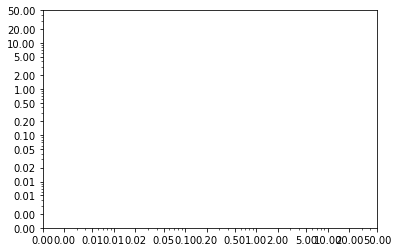

In [60]:
P = [[0.6,0.4],[0.2,0.8],[0.3,0.7],[0.9,0.1]]
#print(np.size(P,1))
T = [0,1,1,0]
DETmodf(P,T,100)

def 

In [12]:
onepath = r'/home/subbu/PRML/1'
filenames=glob.glob(onepath+"/*.txt")
datal = []
for file in filenames:
    data = np.genfromtxt(file,dtype=str,delimiter=' ',skip_header=1)
    

In [20]:
arr1 = array.array('i',[1,2,3])
print(arr1)
arr2 = [1 2 3]

SyntaxError: invalid syntax (<ipython-input-20-a3c14eb95855>, line 3)

In [81]:
def Normalize (Input):
    In = np.array(Input)
    mn = In.mean(axis = 0)
    var = In.var(axis = 0)
    x = In.shape[0]
    ans = np.zeros((x,2))
    for i in range(x):
        ans[i] = np.subtract(In[i],mn)
        ans[i] = np.divide(ans[i],var)
    return ans

In [83]:
In = np.array([[6,4],[8,8]])
mn = In.mean(axis = 0)
print(mn)
var = In.var(axis = 0)
print(var)
print(Normalize(In))

[7. 6.]
[1. 4.]
[[-1.  -0.5]
 [ 1.   0.5]]


In [2]:
exp = lambda t: np.exp(t)
Rhnorm=[]
for i in range(np.shape(Rh)[0]):
    a=(np.array([exp(xi) for xi in Rh[i]]))
    s=sum(a) 
    norm = lambda t:(t/s)
    a=(np.array([norm(xi) for xi in a]))
    Rhnorm.append(a)


NameError: name 'np' is not defined

In [71]:
str_list = []
def stg(N):
    if(N == 0):
        l=[]
        return l 
    tsl =[]
    for i in range(5):
        sl = stg(N-1)
        s = np.shape(sl)
        if(s[0]==0):
            if(i==0): 
                str='0'
            if(i==1): 
                str='1'
            if(i==2): 
                str='2'
            if(i==3): 
                str='3'
            if(i==4):
                str='4'
            tsl.append(str)
        for j in range(s[0]):
            str=""
            if(i==0): 
                str='0'+sl[j]
            if(i==1): 
                str='1'+sl[j]
            if(i==2): 
                str='2'+sl[j]
            if(i==3): 
                str='3'+sl[j]
            if(i==4):
                str='4'+sl[j]
            tsl.append(str)
    return tsl


states = [20,20,20,20,20]

def openmodifyretfile(f,k,m):
    fl = open(f,"r+")
    l=fl.readlines()
    lm = []
    for i in range(states[k]):
        if(i == (states[k]-1) and (m==1)):
            t = l[3*i].split("\t")
            #print(t)
            t[0] ='0.900000'
            s = ""
            for j in range(np.shape(t)[0]):
                s = s + t[j]
                if(j < (np.shape(t)[0])-1):
                    s = s + "\t"
            lm.append(s)
            t = l[3*i+1].split("\t")
            t[0] ='0.100000'
            s = t[0] + "\t"
            for j in range((np.shape(t)[0]) - 1):
                temp = j
                s = s + t[temp+1]
                s = s + "\t"
            lm.append(s)
        else:
            lm.append(l[3*i])
            lm.append(l[3*i+1])
        lm.append(l[3*i+2])
        s = ""
        for i in range(np.shape(lm)[0]):
                s = s + lm[i]
    return s

def createconhmm(s):
    print(s)
    l = len(s)
    rlp=""
    stsum =0
    for i in range(l):
        if(s[i]=='0'):
            sind=0
        if(s[i]=='1'):
            sind=1
        if(s[i]=='2'):
            sind=2
        if(s[i]=='3'):
            sind=3
        if(s[i]=='4'):
            sind=4
        stsum+=states[sind]
        m = 1
        if(i==l-1):
            m = 0
        fp = ("hmm-1.04/"+str(s[i])+".txt")
        if(i==l-1):
            m= 0
        rlp = rlp + openmodifyretfile(fp,sind,m) 
    wtxt = "states: "+str(stsum)+"\n"+"symbols: "+str(symbols)+"\n" + rlp
    with open('hmm-1.04/3b/'+s+'.chmm', 'w') as f:
        f.write("%s " % wtxt)

for i in range(5):
        if(i==0):
            s='0'
        if(i==1):
            s='1'
        if(i==2):
            s='2'
        if(i==3):
            s='3'
        if(i==4):
            s='4'
        createconhmm(s)
for j in range(5):
        if(j==0):
            s='0'
        if(j==1):
            s='1'
        if(j==2):
            s='2'
        if(j==3):
            s='3'
        if(j==4):
            s='4'
        s1=s
        for i in range(5):
                if(i==0):
                    s='0'
                if(i==1):
                    s='1'
                if(i==2):
                    s='2'
                if(i==3):
                    s='3'
                if(i==4):
                    s='4'
                s = s1 + s
                createconhmm(s)
for k in range(5):
        if(k==0):
            s='0'
        if(k==1):
            s='1'
        if(k==2):
            s='2'
        if(k==3):
            s='3'
        if(k==4):
            s='4'
        s2=s
        for j in range(5):
            if(j==0):
                s='0'
            if(j==1):
                s='1'
            if(j==2):
                s='2'
            if(j==3):
                s='3'
            if(j==4):
                s='4'
            s1=s
            for i in range(5):
                    if(i==0):
                        s='0'
                    if(i==1):
                        s='1'
                    if(i==2):
                        s='2'
                    if(i==3):
                        s='3'
                    if(i==4):
                        s='4'
                    s = s2 + s1 + s
                    createconhmm(s)
        

In [ ]:
clubdpath = r'/home/subbu/PRML/PRML3/hmm-1.04/3b/team6'
def writfiles(s):
    
    # reading from mfcc

    filename=(clubdpath+'/'+s+'.txt')
    clubdatal=[]
    data = np.genfromtxt(filename,dtype=float,delimiter=' ',skip_header=1)
    clubdatal.append(data)

    # writing
    l = s.split("_")
    st = ""
    
    with open('hmm-1.04/3b/'+s+'d.hmm', 'w') as f:
            idx,_ = vqs(clubdatal[0],cen)
            print( np.shape(idx))
            for item in idx:
                f.write("%s " % item)
            f.write("\n")


import subprocess
working_directory="/home/subbu/PRML/PRML3/hmm-1.04/3b"
def printalp(st,s):
    p = subprocess.Popen(['./test_hmm',st+'d.hmm',s+'.chmm'], cwd=working_directory)
    p.wait(1)
    f = 'hmm-1.04/3b/alphaout'
    fl = open(f,"r+")
    l=fl.readlines()
    t = l[0].split(" ")
    v = t[1].split("\n")
    #print(float(v[0]),end=" ")
    #print(s)
    return float(v[0]),s
def findmin(st):
    m = -(2**32)
    res=""
    L = len(st)
    if L == 1:
        for i in range(5):
            if(i==0):
                s='0'
            if(i==1):
                s='1'
            if(i==2):
                s='2'
            if(i==3):
                s='3'
            if(i==4):
                s='4'
            a,b=printalp(st,s)
            if(a >= m):
                res = s
                m = a
    if L ==2 :
        for j in range(5):
                if(j==0):
                    s='0'
                if(j==1):
                    s='1'
                if(j==2):
                    s='2'
                if(j==3):
                    s='3'
                if(j==4):
                    s='4'
                s1=s
                for i in range(5):
                        if(i==0):
                            s='0'
                        if(i==1):
                            s='1'
                        if(i==2):
                            s='2'
                        if(i==3):
                            s='3'
                        if(i==4):
                            s='4'
                        s = s1 + s
                        a,b=printalp(st,s)
                        if(a > m):
                            res = s
                            m = a
    if L == 3:
        for k in range(5):
                if(k==0):
                    s='0'
                if(k==1):
                    s='1'
                if(k==2):
                    s='2'
                if(k==3):
                    s='3'
                if(k==4):
                    s='4'
                s2=s
                for j in range(5):
                    if(j==0):
                        s='0'
                    if(j==1):
                        s='1'
                    if(j==2):
                        s='2'
                    if(j==3):
                        s='3'
                    if(j==4):
                        s='4'
                    s1=s
                    for i in range(5):
                            if(i==0):
                                s='0'
                            if(i==1):
                                s='1'
                            if(i==2):
                                s='2'
                            if(i==3):
                                s='3'
                            if(i==4):
                                s='4'
                            s = s2 + s1 + s
                            a,b=printalp(st,s)
                            if(a > m):
                                res = s
                                m = a

    return res

def checkcorrect(s):
    if s == findmin(s):
        print(1)